# 2. Disconnected Trajectories

This vignette shows the basic workflow of Via for disconnected trajectories and how to access the different visualizations after running the computations. We use a toydataset with two disconnected components to show different ways to set the root conditions depending on the availability of labels and root level information apriori. 


In [2]:
import pyVIA.core as via
import pyVIA.datasets_via as datasets_via
import scanpy as sc
import pandas as pd 

import umap

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-pac

### Load data

In [3]:

#Since this is a toy dataset, we known the labels of each cell in terms of component and milestone. So T1_M1 is Trajectory1_Milestone1 (the milestones are not listed in any particular order, so M2 is not neccessarily earlier than M5)

#make anndata object with counts and group_ids 
adata_counts = datasets_via.toy_disconnected(foldername='./')
print(adata_counts)
true_label = adata_counts.obs['group_id'].tolist()

#define parameters
#for more generic purposes, dataset can be ='group' if root is a group level assignment corresponding to a group in true_label. or left as '', in which case root_user = [cell index] where cell index is an int
ncomps, knn, random_seed, dataset, root_user  =30,10, 2,'toy', ['T1_M1', 'T2_M1'] 

sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=ncomps)



/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'group_id', 'true_time'


### Initialize and run VIA

In this example we provide two group level root cells (T1_M1 and T2_M1). We therefore need to set dataset='group'

In [4]:
'''
# knn: number of nearest neighbors for the KNN-graph 
# clustergraph_pruning: typically 0-3, the number of standard deviations for clustergraph pruning. level of pruning applied to the clustergraph carried forward for pseudotime and lineage probability calculations. Larger means less pruning  
# true_label: list of annotations. if these are unavailable then leave as default None
# dist_std_local: local pruning on the singlecell graph used for clustering step, 1 is quite quite minimal level of pruning.  
# too_big_factor: default 0.3. Clusters that are bigger than 30% of the entire cell population will be re-clustered. If you only plan to do one iteration of VIA before visualizing TI, consider lowering this to 0.1-0.2.  
# preserve_disconnected: if you suspect disconnected trajectories, set this to False
# dataset = 'group': works for any dataset where the root is provided as a group ID in the true_label. e.g. if root = ['Day0'], then the root will be selected as a cluster which has root like properties and is largely made up of 'Day0' cells. 
            #If you wish to run a second finegrained iteration of VIA on a disconnected dataset, but uses the terminal clusters from the previous coarse run, then the dataset should be set as 'toy' and the true_labels formatted as "T1_M1" where Tx is the x'th component and My is the y'th cluster.
            # otherwise for disconnected datasets, you can just run a single iteration of VIA where you vary too_big_factor and other parameters to change granularity and set the dataset as '' or 'group' depending on the root_user type as [groupX, groupZ ...] or [cell indices...]  
            # dataset, can be left as default value '', but then the root must be a cell index corresponding to a best guess. 
# visual_cluster_graph_pruning: this impacts the level of pruning done to the clustergraph before visualization. Does not impact underlying computations  
# Max_visual_outgoing_edges: controls number of edges extending from each node
# Embedding_type can be set to 'via-umap' or 'via-mds'. via-mds is very fast and produces more continous plots. 'via-umap' is initialized by the viagraph. To have more control of the plotting configurations/ 
 and the generation of these embeddings, the functions via.run_umap_hnsw(via_object = v0)and via.via_mds(via_object=v0) can be called after running base case via v0=via.VIA()

'''


v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, edgepruning_clustering_resolution=0.15, edgepruning_clustering_resolution_local=1,
             knn=knn, cluster_graph_pruning=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',random_seed=random_seed)
v0.run_VIA()

2023-10-12 16:14:16.244889	Running VIA over input data of 1000 (samples) x 30 (features)
2023-10-12 16:14:16.244949	Knngraph has 10 neighbors
2023-10-12 16:14:16.596490	Finished global pruning of 10-knn graph used for clustering at level of 0.15. Kept 50.2 % of edges. 
2023-10-12 16:14:16.602625	Number of connected components used for clustergraph  is 2
2023-10-12 16:14:16.621793	Commencing community detection
2023-10-12 16:14:16.637361	Finished running Leiden algorithm. Found 35 clusters.
2023-10-12 16:14:16.638715	Merging 20 very small clusters (<10)
2023-10-12 16:14:16.639771	Finished detecting communities. Found 15 communities
2023-10-12 16:14:16.640069	Making cluster graph. Global cluster graph pruning level: 1
2023-10-12 16:14:16.644297	Graph has 2 connected components before pruning
2023-10-12 16:14:16.646449	Graph has 2 connected components after pruning
2023-10-12 16:14:16.646706	Graph has 2 connected components after reconnecting
2023-10-12 16:14:16.647272	0.0% links trimmed 

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
do scaling of pt
2023-10-12 16:14:22.958974	Identifying terminal clusters corresponding to unique lineages...
2023-10-12 16:14:22.958999	Closeness:[2, 3, 4]
2023-10-12 16:14:22.959013	Betweenness:[2, 3, 4]
2023-10-12 16:14:22.959022	Out Degree:[3, 4]
2023-10-12 16:14:22.959391	Terminal clusters corresponding to unique lineages in this component are [3, 4] 
TESTING rw2_lineage probability at memory 5
testing rw2 lineage probability at memory 5
g.indptr.size, 6


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

2023-10-12 16:14:28.281297	 Cluster or terminal cell fate 3 is reached 944.0 times
2023-10-12 16:14:28.325328	 Cluster or terminal cell fate 4 is reached 342.0 times
2023-10-12 16:14:28.328641	component number 1 out of  [0, 1]
2023-10-12 16:14:28.331618	group root method
2023-10-12 16:14:28.331665	group root method
2023-10-12 16:14:28.331675	for component 1, the root is T2_M1 and ri T2_M1
cluster 1 has majority T2_M5
cluster 2 has majority T2_M2
cluster 3 has majority T2_M1
2023-10-12 16:14:28.333632	New root is 3 and majority T2_M1
cluster 5 has majority T2_M4
cluster 6 has majority T2_M3
cluster 8 has majority T2_M6
cluster 9 has majority T2_M2
cluster 10 has majority T2_M4
cluster 12 has majority T2_M5
cluster 14 has majority T2_M3
2023-10-12 16:14:28.334646	Computing lazy-teleporting expected hitting times


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/core.py:2447: RuntimeWarning: invalid value encountered in divide
  bp_array = bp_array / bp_array.sum(axis=1)[:, None]  # row normalization at the cluster level


2023-10-12 16:14:28.678470	 ended all multiprocesses, will retrieve and reshape
try rw2 hitting times setup
start computing walks with rw2 method
g.indptr.size, 11


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
do scaling of pt
2023-10-12 16:14:32.733637	Identifying terminal clusters corresponding to unique lineages...
2023-10-12 16:14:32.733667	Closeness:[1, 5, 6, 7]
2023-10-12 16:14:32.733683	Betweenness:[1, 4, 5, 6, 7]
2023-10-12 16:14:32.733696	Out Degree:[1, 5, 6, 7]
2023-10-12 16:14:32.734192	Terminal clusters corresponding to unique lineages in this component are [1, 5, 6, 7] 
TESTING rw2_lineage probability at memory 5
testing rw2 lineage probability at memory 5
g.indptr.size, 11


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

2023-10-12 16:14:36.444718	 Cluster or terminal cell fate 1 is reached 968.0 times
2023-10-12 16:14:36.504059	 Cluster or terminal cell fate 5 is reached 172.0 times
2023-10-12 16:14:36.553546	 Cluster or terminal cell fate 6 is reached 509.0 times
2023-10-12 16:14:36.606769	 Cluster or terminal cell fate 7 is reached 973.0 times
2023-10-12 16:14:36.613832	There are (6) terminal clusters corresponding to unique lineages {11: 'T1_M2', 13: 'T1_M4', 2: 'T2_M2', 8: 'T2_M6', 9: 'T2_M2', 10: 'T2_M4'}
2023-10-12 16:14:36.613881	Begin projection of pseudotime and lineage likelihood
2023-10-12 16:14:36.787228	Cluster graph layout based on forward biasing
2023-10-12 16:14:36.789109	Starting make edgebundle viagraph...
2023-10-12 16:14:36.789135	Make via clustergraph edgebundle
2023-10-12 16:14:38.597314	Hammer dims: Nodes shape: (15, 2) Edges shape: (28, 3)
2023-10-12 16:14:38.598162	Graph has 2 connected components before pruning
2023-10-12 16:14:38.600122	Graph has 5 connected components after

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


### Draw the viagraph 
Left-hand side axis is colored by values in `via_object.true_label`. Coloring controlled by `cmap_piechart`. To color these piecharts by some other reference labels, pass a list into the argument `reference_labels` of the `plot_piechart_viagraph`
Right-hand side axis is colored by the pseudotime

In [6]:
f,ax,ax2= via.plot_piechart_viagraph(via_object=v0, cmap_piechart='rainbow', cmap='plasma')

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/plotting_via.py:3092: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(node_pos[:, 0], node_pos[:, 1],


### Initial state 
#### Roots can also be provided as cell indices
If the roots are provided as indices, the dataset parameter should be set to dataset=''. If the roots are group level labels, then dataset = 'group'. This tells via which approach to take for identifying the root. 

In [10]:
#consider providing the roots as indices corresponding to the desired start cells
root_user, dataset = [136,4], ''
v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, edgepruning_clustering_resolution=0.15, edgepruning_clustering_resolution_local=1,
             knn=knn, cluster_graph_pruning=1,             too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='', random_seed=random_seed)
v0.run_VIA()

2023-10-12 14:15:46.626276	Running VIA over input data of 1000 (samples) x 30 (features)
2023-10-12 14:15:46.626328	Knngraph has 10 neighbors
2023-10-12 14:15:46.993923	Finished global pruning of 10-knn graph used for clustering at level of 0.15. Kept 50.2 % of edges. 
2023-10-12 14:15:47.002606	Number of connected components used for clustergraph  is 2
2023-10-12 14:15:47.032302	Commencing community detection
2023-10-12 14:15:47.046669	Finished running Leiden algorithm. Found 35 clusters.
2023-10-12 14:15:47.047752	Merging 20 very small clusters (<10)
2023-10-12 14:15:47.048800	Finished detecting communities. Found 15 communities
2023-10-12 14:15:47.049094	Making cluster graph. Global cluster graph pruning level: 1
2023-10-12 14:15:47.053235	Graph has 2 connected components before pruning
2023-10-12 14:15:47.055273	Graph has 2 connected components after pruning
2023-10-12 14:15:47.055491	Graph has 2 connected components after reconnecting
2023-10-12 14:15:47.056172	0.0% links trimmed 

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
do scaling of pt
2023-10-12 14:15:51.415494	Identifying terminal clusters corresponding to unique lineages...
2023-10-12 14:15:51.415532	Closeness:[2, 3, 4]
2023-10-12 14:15:51.415551	Betweenness:[2, 3, 4]
2023-10-12 14:15:51.415573	Out Degree:[3, 4]
2023-10-12 14:15:51.416230	Terminal clusters corresponding to unique lineages in this component are [3, 4] 
TESTING rw2_lineage probability at memory 5
testing rw2 lineage probability at memory 5
g.indptr.size, 6


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

2023-10-12 14:15:55.322206	 Cluster or terminal cell fate 3 is reached 946.0 times
2023-10-12 14:15:55.368623	 Cluster or terminal cell fate 4 is reached 374.0 times
2023-10-12 14:15:55.372102	component number 1 out of  [0, 1]
2023-10-12 14:15:55.374228	The root index, 4 provided by the user belongs to cluster number 3 and corresponds to cell type T2_M1
2023-10-12 14:15:55.377405	Computing lazy-teleporting expected hitting times


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/core.py:2447: RuntimeWarning: invalid value encountered in divide
  bp_array = bp_array / bp_array.sum(axis=1)[:, None]  # row normalization at the cluster level


2023-10-12 14:15:55.715180	 ended all multiprocesses, will retrieve and reshape
try rw2 hitting times setup
start computing walks with rw2 method
g.indptr.size, 11


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
do scaling of pt
2023-10-12 14:15:59.380054	Identifying terminal clusters corresponding to unique lineages...
2023-10-12 14:15:59.380104	Closeness:[1, 5, 6, 7]
2023-10-12 14:15:59.380127	Betweenness:[1, 4, 5, 6, 7]
2023-10-12 14:15:59.380145	Out Degree:[1, 5, 6, 7]
2023-10-12 14:15:59.380804	Terminal clusters corresponding to unique lineages in this component are [1, 5, 6, 7] 
TESTING rw2_lineage probability at memory 5
testing rw2 lineage probability at memory 5
g.indptr.size, 11


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pecanpy/graph.py:90: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

2023-10-12 14:16:03.077495	 Cluster or terminal cell fate 1 is reached 974.0 times
2023-10-12 14:16:03.133979	 Cluster or terminal cell fate 5 is reached 198.0 times
2023-10-12 14:16:03.181236	 Cluster or terminal cell fate 6 is reached 501.0 times
2023-10-12 14:16:03.245110	 Cluster or terminal cell fate 7 is reached 982.0 times
2023-10-12 14:16:03.253053	There are (6) terminal clusters corresponding to unique lineages {11: 'T1_M2', 13: 'T1_M4', 2: 'T2_M2', 8: 'T2_M6', 9: 'T2_M2', 10: 'T2_M4'}
2023-10-12 14:16:03.253101	Begin projection of pseudotime and lineage likelihood
2023-10-12 14:16:03.451333	Cluster graph layout based on forward biasing
2023-10-12 14:16:03.454393	Starting make edgebundle viagraph...
2023-10-12 14:16:03.454426	Make via clustergraph edgebundle
2023-10-12 14:16:03.673289	Hammer dims: Nodes shape: (15, 2) Edges shape: (28, 3)
2023-10-12 14:16:03.674649	Graph has 2 connected components before pruning
2023-10-12 14:16:03.677158	Graph has 5 connected components after

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/home/user/PycharmProjects/Via2_May2023_py310/plotting_via.py:3104: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(node_pos[:, 0], node_pos[:, 1],


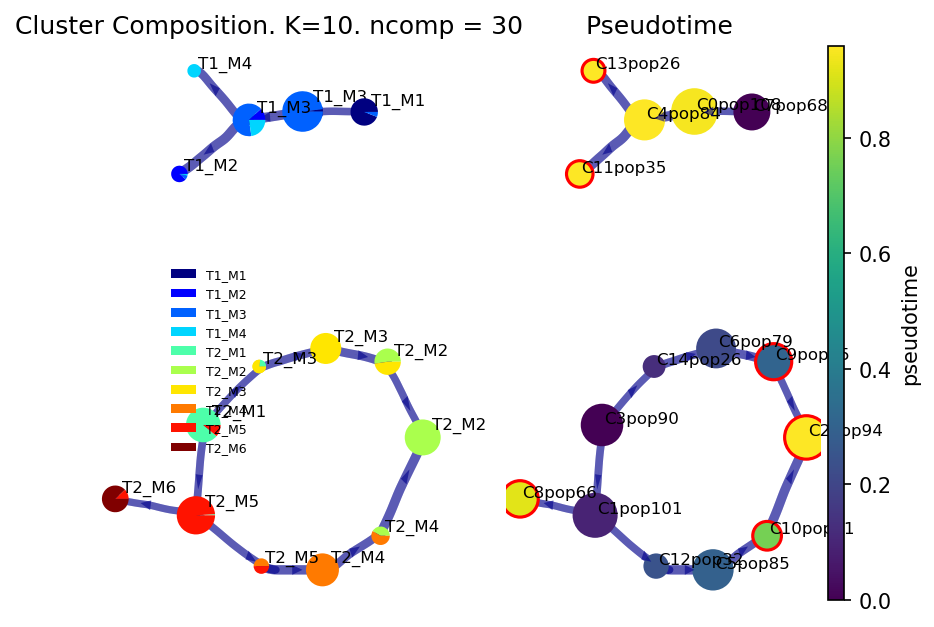

In [16]:
f, ax1, ax2 = via.plot_piechart_viagraph(via_object=v0, cmap_piechart='jet', cmap='viridis', pie_size_scale=1, size_node_notpiechart=1)

X-input (1000, 30)
len membership and n_cells 1000 1000
n cell 1000
2023-10-12 16:15:10.827802	Computing embedding on sc-Viagraph
2023-10-12 16:15:10.828568	using via cluster graph to initialize embedding


  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1000, 2)


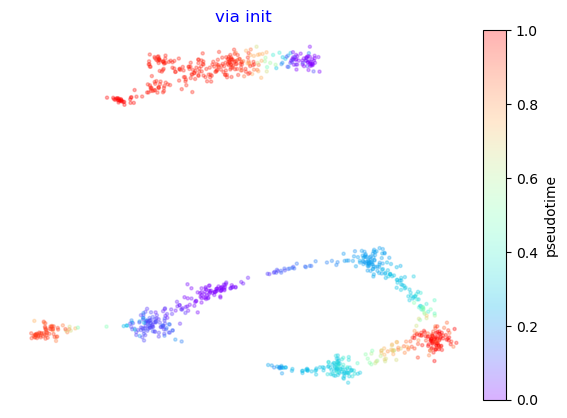

In [7]:
e1 = via.via_atlas_emb(via_object=v0, n_epochs=100, init_pos='via')
print(e1.shape)
f,ax =via.plot_scatter(embedding=e1, labels=v0.single_cell_pt_markov, title='via init')


### Plot Atlas View
Plot the directed connectivity combined with high resolution of spatial layout. The edges are directed by the inferred Pseudotime
- colored by pseudotime 
- by celltype
- lineage pathways from root to terminal cell fate

In [10]:
v0.embedding = e1
f,ax = via.plot_atlas_view(via_object=v0, n_milestones=150, linewidth_bundle=0.5, headwidth_bundle=0.3)
f.set_size_inches(5,4)

2023-10-12 16:15:53.714670	Computing Edges
2023-10-12 16:15:53.715100	Start finding milestones
2023-10-12 16:15:54.570913	End milestones with 150
2023-10-12 16:15:54.573976	Recompute weights
2023-10-12 16:15:54.596576	pruning milestone graph based on recomputed weights
2023-10-12 16:15:54.597986	Graph has 2 connected components before pruning
2023-10-12 16:15:54.598929	Graph has 2 connected components after pruning
2023-10-12 16:15:54.599192	Graph has 2 connected components after reconnecting
2023-10-12 16:15:54.601260	regenerate igraph on pruned edges
2023-10-12 16:15:54.610036	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-10-12 16:15:54.622472	Making smooth edges
inside add sc embedding second if


2023-10-12 16:22:21.600289	Computing Edges
2023-10-12 16:22:21.600369	Start finding milestones
2023-10-12 16:22:22.458731	End milestones with 150
2023-10-12 16:22:22.460412	Recompute weights
2023-10-12 16:22:22.474079	pruning milestone graph based on recomputed weights
2023-10-12 16:22:22.475248	Graph has 2 connected components before pruning
2023-10-12 16:22:22.476176	Graph has 2 connected components after pruning
2023-10-12 16:22:22.476436	Graph has 2 connected components after reconnecting
2023-10-12 16:22:22.478479	regenerate igraph on pruned edges
2023-10-12 16:22:22.487920	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-10-12 16:22:22.504859	Making smooth edges
inside add sc embedding second if


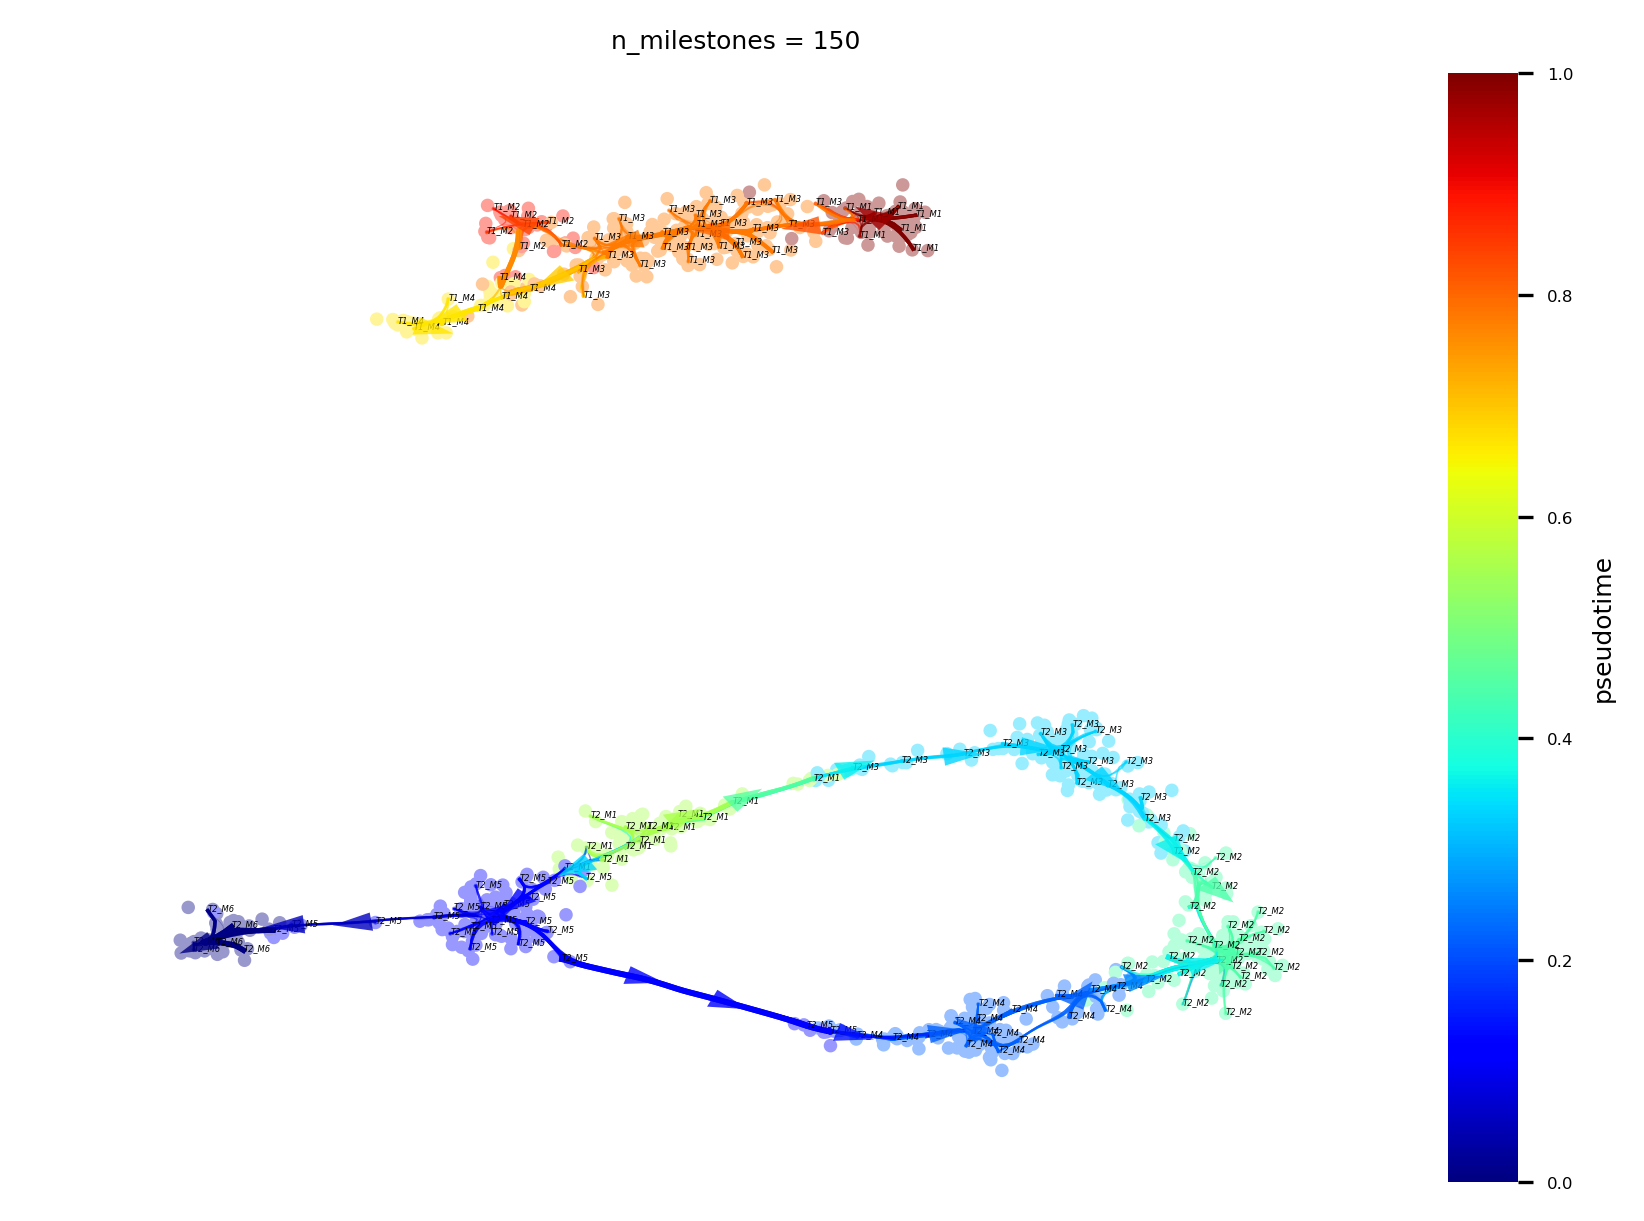

In [17]:

f,ax = via.plot_atlas_view(via_object=v0, linewidth_bundle=1, headwidth_bundle=0.3, n_milestones=150, sc_labels_expression=true_label, text_labels=True, sc_labels=true_label, fontsize_labels=2, cmap='jet', colorbar_legend='celltype')

2023-10-12 16:19:35.609089	Computing Edges
2023-10-12 16:19:35.609148	Start finding milestones
2023-10-12 16:19:36.431670	End milestones with 150
2023-10-12 16:19:36.433421	Recompute weights
2023-10-12 16:19:36.449687	pruning milestone graph based on recomputed weights
2023-10-12 16:19:36.450963	Graph has 2 connected components before pruning
2023-10-12 16:19:36.451904	Graph has 2 connected components after pruning
2023-10-12 16:19:36.452170	Graph has 2 connected components after reconnecting
2023-10-12 16:19:36.454188	regenerate igraph on pruned edges
2023-10-12 16:19:36.463885	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-10-12 16:19:36.471978	Making smooth edges
location of 11 is at [0] and 0
location of 13 is at [1] and 1
location of 8 is at [3] and 3


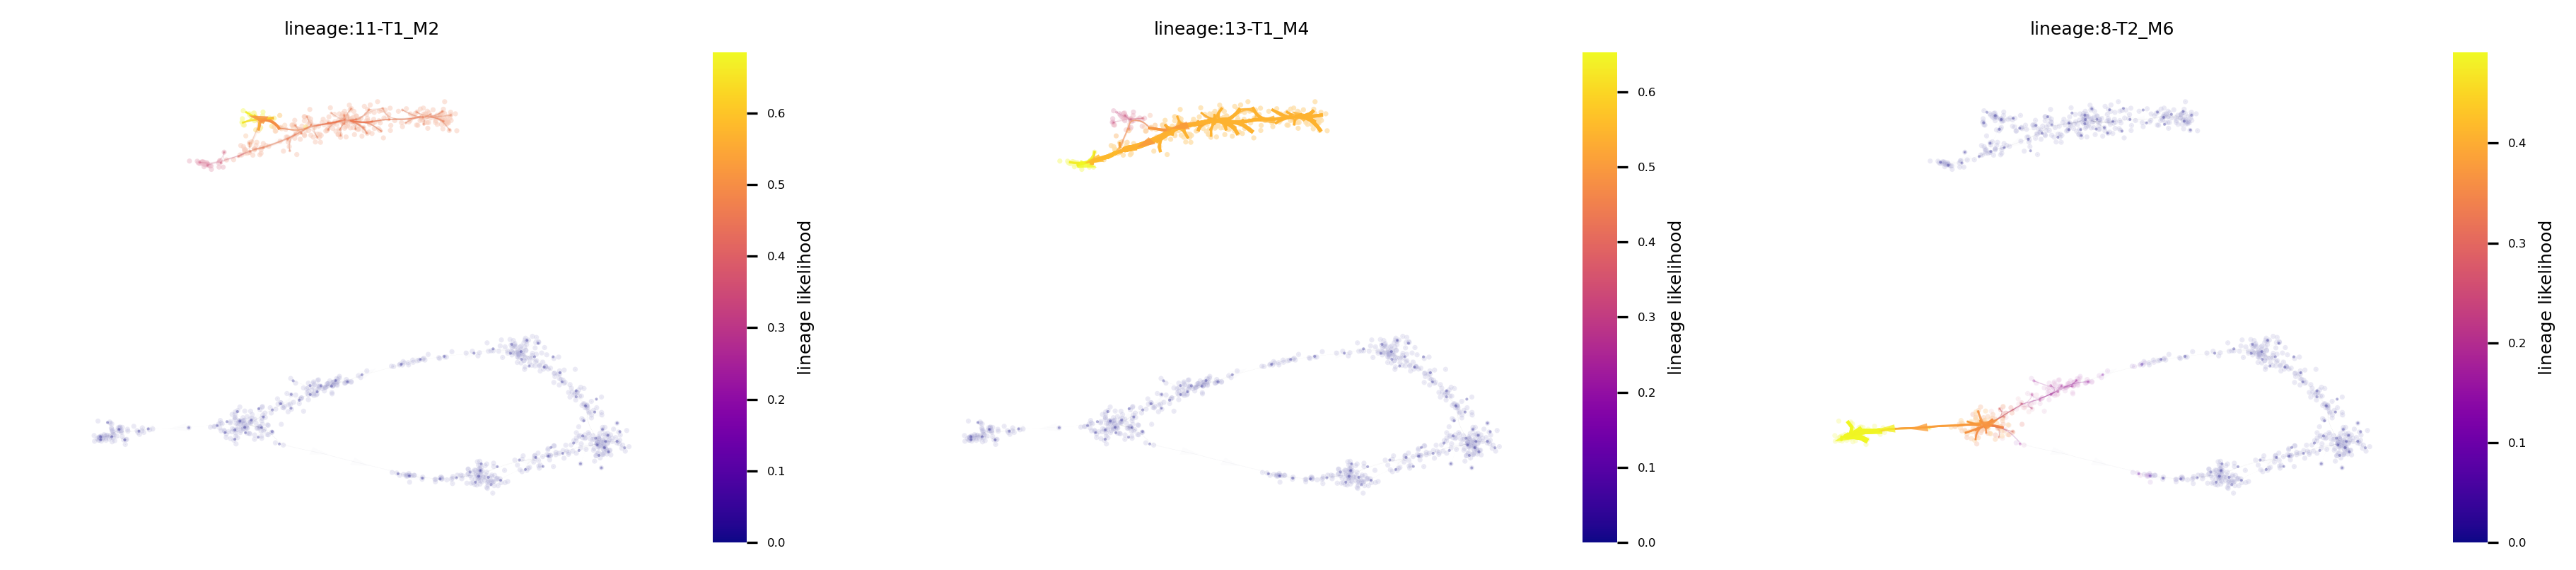

In [15]:
f,ax = via.plot_atlas_view(via_object=v0, linewidth_bundle=1, headwidth_bundle=0.3, lineage_pathway=[11,13,8])
f.set_size_inches(15,3)

### Fine-grained vector field
Draw a stream plot that shows the directionality at a higher resolution

In [19]:
#default parameters:
# scatter_size=500
# scatter_alpha=0.5
# marker_edgewidth=0.1, outline of scatter points
# density_stream = 2, spacing between field lines
# smooth_transition=1,smoothing of transition matrix over neighbors of neighbors
# color_scheme = 'annotation', corresponds to true_labels provided. Can also be set to 'cluster' and 'time'
# add_outline_clusters=False
v0.embedding = e1
f,ax =via.via_streamplot(v0)
f.set_size_inches(4,3)

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/core.py:1318: RuntimeWarning: Mean of empty slice.
  V_emb[i] = probs.dot(dX) - probs.mean() * dX.sum(0)
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:1931: RuntimeWarning: Mean of empty slice.
  V_emb[i] = probs.dot(dX) - probs.mean() * dX.sum(0)
/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-07-09 16:37:52.063276	Inside animated. File will be saved to location /home/shobi/Trajectory/Datasets/Toy4/toy4_animation.gif


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

total number of stream lines 560


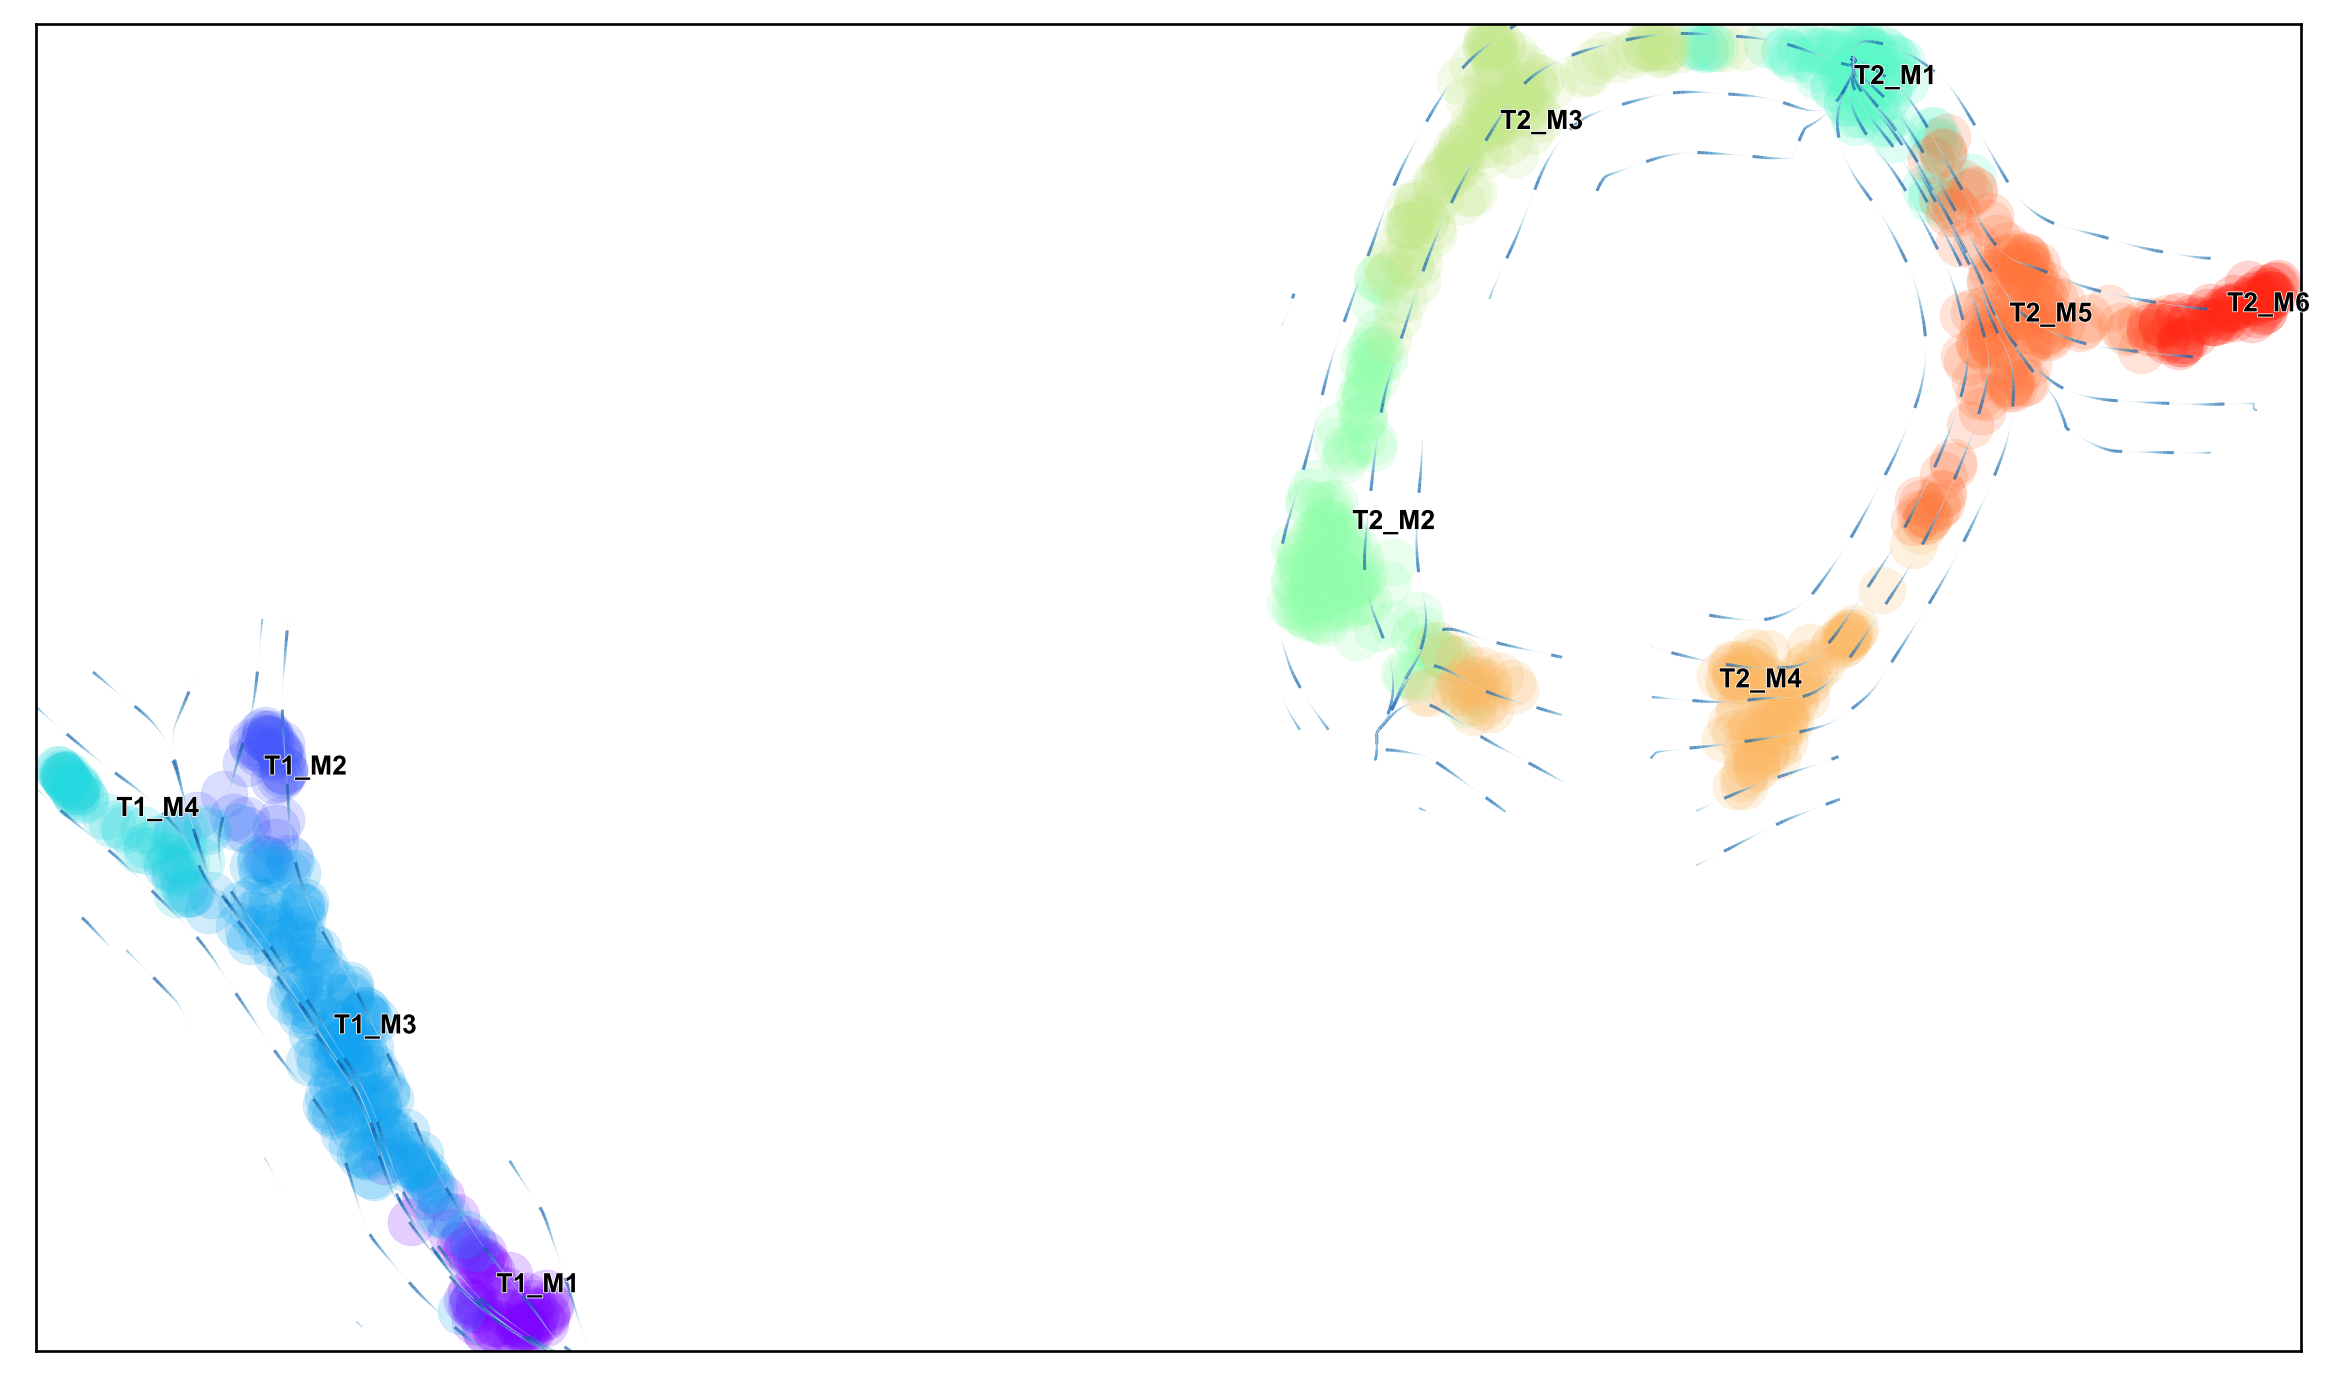

In [8]:
sc.settings.set_figure_params(dpi=120, facecolor='white')
via.animated_streamplot(v0, scatter_size=200, scatter_alpha=0.2, density_grid=1, saveto='/home/user/Trajectory/Datasets/Toy4/toy4_animation_.gif' )

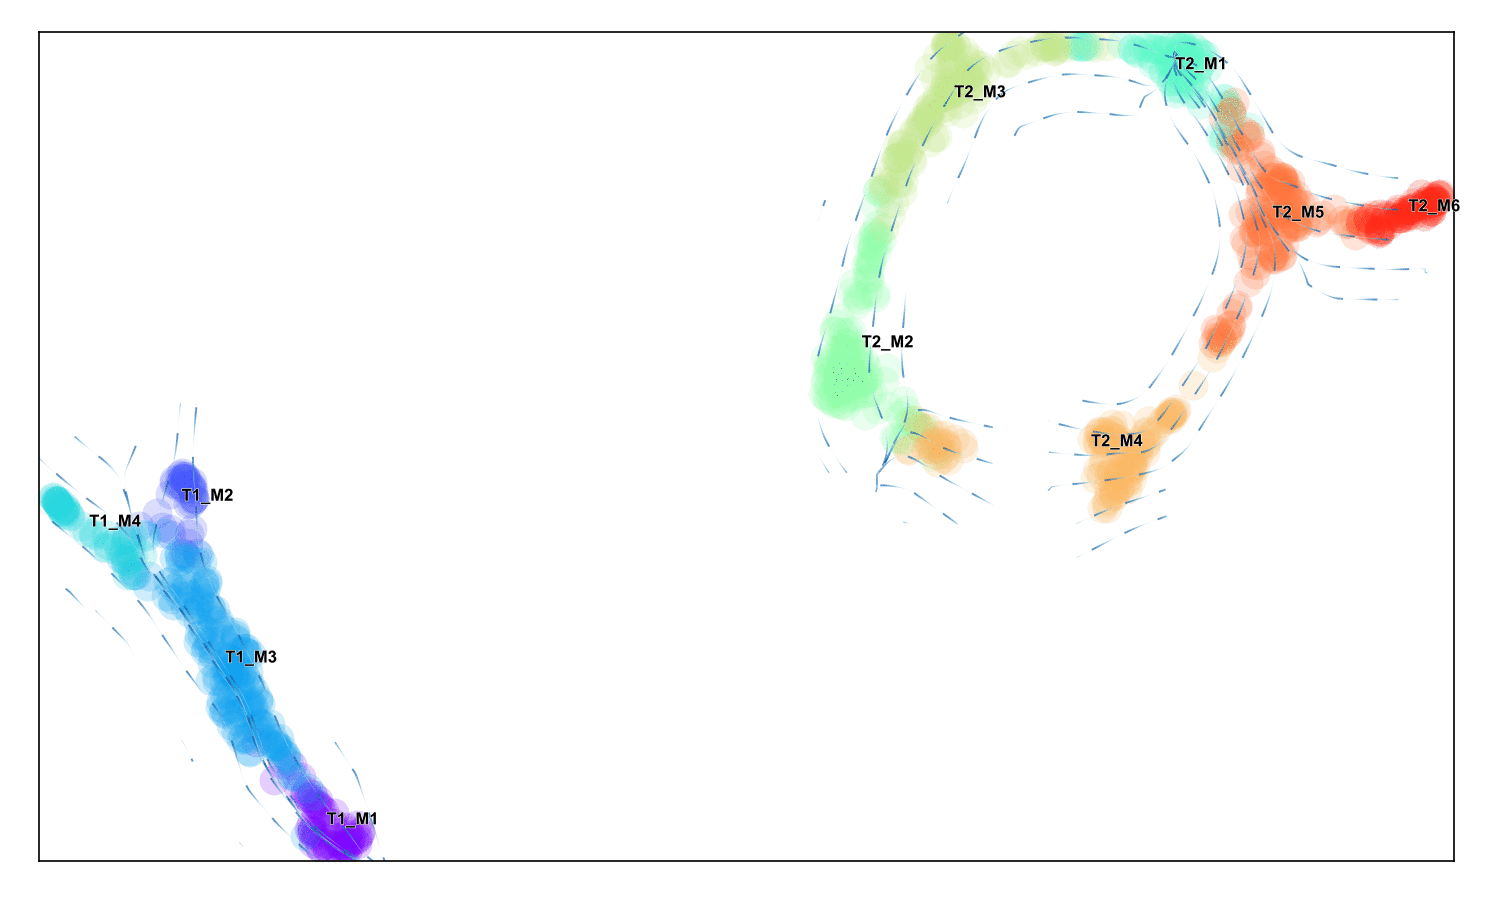

In [9]:
from IPython.display import Image
with open('/home/shobi/Trajectory/Datasets/Toy4/toy4_animation.gif','rb') as file:
    display(Image(file.read()))

### Overall Trajectory
Draw high-level pseudotime and main trajectories by projecting clustergraph onto umap

In [20]:
# draw overall pseudotime and main trajectories
via.plot_trajectory_curves(via_object=v0)

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/plotting_via.py:2641: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  path_orange = G_orange.get_shortest_paths(super_root, to=fst_i)[0]
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

2023-10-12 14:26:49.451690	Super cluster 2 is a super terminal with sub_terminal cluster 11
2023-10-12 14:26:49.451787	Super cluster 8 is a super terminal with sub_terminal cluster 13
2023-10-12 14:26:49.451808	Super cluster 9 is a super terminal with sub_terminal cluster 2
2023-10-12 14:26:49.451825	Super cluster 10 is a super terminal with sub_terminal cluster 8
2023-10-12 14:26:49.451841	Super cluster 11 is a super terminal with sub_terminal cluster 9
2023-10-12 14:26:49.451858	Super cluster 13 is a super terminal with sub_terminal cluster 10


(<Figure size 3000x1500 with 3 Axes>,
 <Axes: title={'center': 'True Labels: ncomps:30. knn:10'}>,
 <Axes: title={'center': 'Pseudotime'}>)

### Lineage Probabilities
Plot the lineage probabilities for each lineage (associated with its terminal state, e.g. the leaf nodes)

In [21]:
via.plot_sc_lineage_probability(via_object=v0)


2023-10-12 14:27:39.714549	Marker_lineages: [11, 13, 2, 8, 9, 10]
2023-10-12 14:27:39.715041	Automatically setting embedding to via_object.embedding
2023-10-12 14:27:39.716301	The number of components in the original full graph is 2
2023-10-12 14:27:39.716333	For downstream visualization purposes we are also constructing a low knn-graph 
2023-10-12 14:27:39.889418	Check sc pb 1.0 
f getting majority comp
2023-10-12 14:27:39.915493	Cluster path on clustergraph starting from Root Cluster 7 to Terminal Cluster 11: [7, 0, 4, 11]
2023-10-12 14:27:39.915525	Cluster path on clustergraph starting from Root Cluster 7 to Terminal Cluster 13: [7, 0, 4, 13]
f getting majority comp
2023-10-12 14:27:39.916266	Cluster path on clustergraph starting from Root Cluster 3 to Terminal Cluster 2: [3, 14, 6, 9, 2]
2023-10-12 14:27:39.916290	Cluster path on clustergraph starting from Root Cluster 3 to Terminal Cluster 8: [3, 1, 8]
2023-10-12 14:27:39.916305	Cluster path on clustergraph starting from Root Clus

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/plotting_via.py:1109: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  path_orange = G_orange.get_shortest_paths(via_object.root[ii], to=fst_i)[0]
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/plotting_via.py:1163: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  path = G.get_shortest_paths(root1_list[p1_cc[loc_ts_current]], to=labelsq1[0][0])  # weights='weight')


2023-10-12 14:27:40.055596	Revised Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 11 along path: [7, 7, 7, 0, 4, 11, 11, 11, 11, 11]
2023-10-12 14:27:40.095151	Revised Cluster level path on sc-knnGraph from Root Cluster 7 to Terminal Cluster 13 along path: []
2023-10-12 14:27:40.134602	Revised Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 2 along path: [3, 3, 3, 1, 12, 5, 10, 2, 2]
2023-10-12 14:27:40.170573	Revised Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 8 along path: [3, 3, 1, 8, 8, 8, 8]
2023-10-12 14:27:40.205726	Revised Cluster level path on sc-knnGraph from Root Cluster 3 to Terminal Cluster 9 along path: []
2023-10-12 14:27:40.247368	Revised Cluster level path on sc-knnGraph from Root Cluster 7 to Terminal Cluster 10 along path: [3, 3, 3, 1, 12, 5, 10, 10, 10, 10, 10]


(<Figure size 960x720 with 12 Axes>,
 array([[<Axes: title={'center': 'Lineage: 11-T1_M2'}>,
         <Axes: title={'center': 'Lineage: 13-T1_M4'}>,
         <Axes: title={'center': 'Lineage: 2-T2_M2'}>],
        [<Axes: title={'center': 'Lineage: 8-T2_M6'}>,
         <Axes: title={'center': 'Lineage: 9-T2_M2'}>,
         <Axes: title={'center': 'Lineage: 10-T2_M4'}>]], dtype=object))

### Gene Dynamics
Plot the gene expression levels along each lineage for marker genes. Here we use dummy values for the Genes which are just the values of the initial PCs for illustrative purposes

In [7]:
df_subset = pd.DataFrame(adata_counts.obsm['X_pca'][:, 0:5], columns=['Gene0', 'Gene1', 'Gene2', 'Gene3', 'Gene4'])
via.get_gene_expression(via0=v0, gene_exp=df_subset, marker_genes=['Gene0', 'Gene1'], fontsize_=8) # since we dont want to plot all the genes in this dataframe, we select the two we wish to see trends for by setting marker_genes = ['Gene0', 'Gene1']